In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
gtr = pd.read_csv('C:\\Users\\edeenee\\Google Drive\\Pythonworks\\Term4\\Projects\\ghouls_train.csv')
gtt = pd.read_csv('C:\\Users\\edeenee\\Google Drive\\Pythonworks\\Term4\\Projects\\ghouls_test.csv')

In [3]:
gtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [4]:
gtt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
id               529 non-null int64
bone_length      529 non-null float64
rotting_flesh    529 non-null float64
hair_length      529 non-null float64
has_soul         529 non-null float64
color            529 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 24.9+ KB


In [5]:
gtr.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [6]:
gtt.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [7]:
gtr.drop(columns='id',inplace=True)

In [8]:
gtr.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [9]:
gtr.shape

(371, 6)

In [10]:
gtt.shape

(529, 6)

In [11]:
gtr.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [12]:
np.sort(gtr['color'].unique())

array(['black', 'blood', 'blue', 'clear', 'green', 'white'], dtype=object)

In [13]:
c_le = preprocessing.LabelEncoder()
c_le.fit(gtr['color'])
gtr['color_le'] = c_le.transform(gtr['color'])

In [14]:
np.sort(gtr['color_le'].unique())

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [15]:
gtr.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type,color_le
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul,3
1,0.575560,0.425868,0.531401,0.439899,green,Goblin,4
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul,0
3,0.776652,0.508723,0.636766,0.884464,black,Ghoul,0
4,0.566117,0.875862,0.418594,0.636438,green,Ghost,4


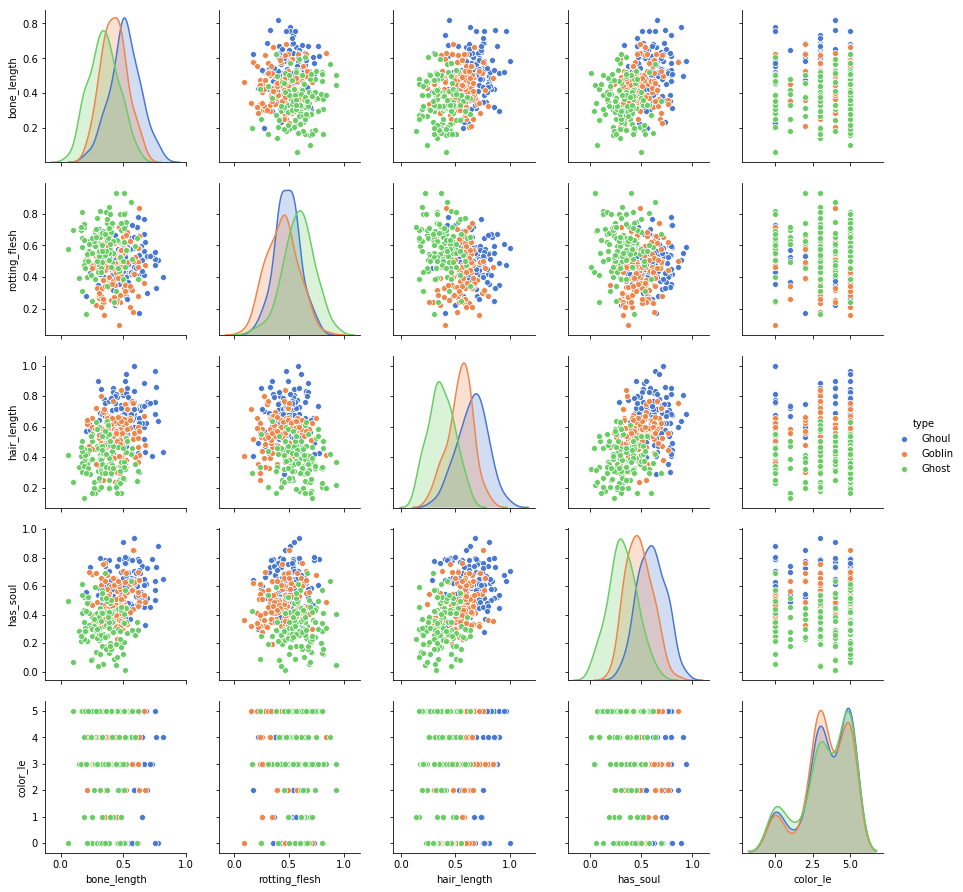

In [16]:
sns.pairplot(gtr.drop('color',axis = 1),hue = 'type', palette = 'muted', diag_kind='kde')

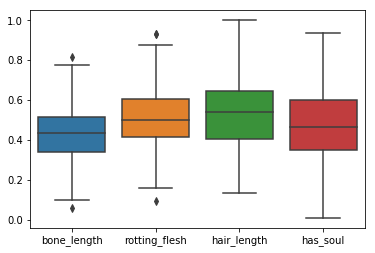

In [17]:
sns.boxplot(data=gtr.drop('color_le',axis =1))

C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


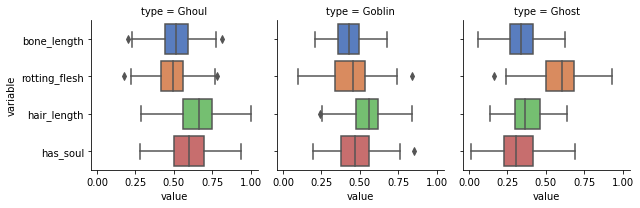

In [18]:
bx = sns.FacetGrid(pd.melt(gtr, id_vars='type', value_vars = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']), col = 'type')
bx = bx.map(sns.boxplot, 'value', 'variable', palette = 'muted')

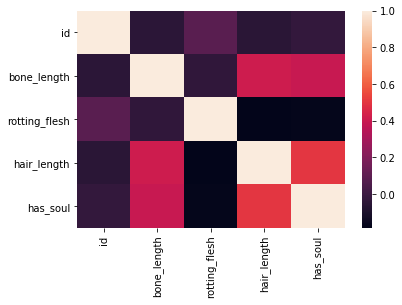

In [20]:
sns.heatmap(gtt.corr())

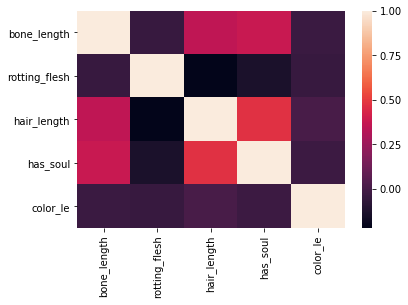

In [21]:
sns.heatmap(gtr.corr())

In [22]:
X = gtr.loc[:,gtr.columns != 'type']
y = gtr.loc[:,gtr.columns == 'type']

In [23]:
X.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,color_le
0,0.354512,0.350839,0.465761,0.781142,clear,3
1,0.575560,0.425868,0.531401,0.439899,green,4
2,0.467875,0.354330,0.811616,0.791225,black,0
3,0.776652,0.508723,0.636766,0.884464,black,0
4,0.566117,0.875862,0.418594,0.636438,green,4


In [24]:
y.head()

,type
0,Ghoul
1,Goblin
2,Ghoul
3,Ghoul
4,Ghost


In [30]:
X1 = X

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [32]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)

In [33]:
print(metrics.classification_report(y_test, y_pred))
print("\nAccuracy Score is: " + str(metrics.accuracy_score(y_test, y_pred)))

             precision    recall  f1-score   support

      Ghost       0.75      0.73      0.74        33
      Ghoul       0.54      0.70      0.61        27
     Goblin       0.50      0.39      0.44        33

avg / total       0.60      0.60      0.60        93


Accuracy Score is: 0.6021505376344086


In [46]:
print(gtt.head())

   bone_length  rotting_flesh  hair_length  has_soul  color_let
0     0.471774       0.387937     0.706087  0.698537          0
1     0.427332       0.645024     0.565558  0.451462          5
2     0.549602       0.491931     0.660387  0.449809          0
3     0.638095       0.682867     0.471409  0.356924          5
4     0.361762       0.583997     0.377256  0.276364          0


In [47]:
X_test = gtt

In [49]:
X_train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_le
263,0.622371,0.385204,0.308995,0.295509,5
225,0.518231,0.494491,0.545443,0.600393,0
186,0.208885,0.399537,0.421704,0.216800,0
214,0.469020,0.621063,0.641631,0.598485,5
306,0.534001,0.595992,0.850140,0.794247,4


In [50]:
X_test.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_let
0,0.471774,0.387937,0.706087,0.698537,0
1,0.427332,0.645024,0.565558,0.451462,5
2,0.549602,0.491931,0.660387,0.449809,0
3,0.638095,0.682867,0.471409,0.356924,5
4,0.361762,0.583997,0.377256,0.276364,0


In [52]:
y_train.head()

,type
263,Ghost
225,Ghoul
186,Ghost
214,Goblin
306,Ghoul


In [53]:
y_test.head()

,type
141,Goblin
142,Ghost
313,Goblin
60,Goblin
302,Ghost


In [56]:
acc_sco = metrics.make_scorer(metrics.accuracy_score)

In [64]:
param = {'n_estimators':[10, 20, 50, 100], 'criterion':['gini', 'entropy'], 'max_depth':[None, 5, 10, 25, 50]}
rf_clf = RandomForestClassifier(random_state=0)
rf_clf_gv = GridSearchCV(rf_clf,param_grid = param, scoring = acc_sco,cv = 7,n_jobs = -1)
rf_clf_gv.fit(X_train,y_train)
print('Best score is {}'.format(rf_clf_gv.best_score_))
print('Best parameters are {}'.format(rf_clf_gv.best_params_))

C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best score is 0.7230215827338129
Best parameters are {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}


In [65]:
y_pred = rf_clf_gv.predict_proba(X_test)

In [67]:
print(y_pred)

[[0.         0.85666667 0.14333333]
 [0.12208338 0.19325662 0.68466   ]
 [0.0304     0.70666749 0.26293251]
 ...
 [0.         0.81869565 0.18130435]
 [0.98       0.01       0.01      ]
 [0.92166667 0.00333333 0.075     ]]


In [117]:
rfb = RandomForestClassifier(n_estimators = 10, random_state = 0)

In [75]:
gtt.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_let,type
0,0.471774,0.387937,0.706087,0.698537,0,Ghoul
1,0.427332,0.645024,0.565558,0.451462,5,Goblin
2,0.549602,0.491931,0.660387,0.449809,0,Ghoul
3,0.638095,0.682867,0.471409,0.356924,5,Ghoul
4,0.361762,0.583997,0.377256,0.276364,0,Ghost


In [76]:
gtt.drop(columns='type',axis=1,inplace=True)

In [109]:
params = {'n_neighbors':[3, 5, 10, 20], 'leaf_size':[20, 30, 50], 'p':[1, 2, 5], 'weights':['uniform', 'distance']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid = params, scoring = acc_sco, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Best score: 0.6870503597122302
Best parameters: {'leaf_size': 20, 'n_neighbors': 20, 'p': 5, 'weights': 'uniform'}


C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [111]:
y_pred = clf.predict(X_test)

In [119]:
knnb = KNeighborsClassifier(leaf_size = 20,n_neighbors = 20, p = 5, weights= 'uniform')

In [107]:
params = {'n_estimators':[10, 25, 50, 100], 'max_samples':[1, 3, 5, 10]}
bag = BaggingClassifier(random_state = 0)
clf = GridSearchCV(bag, param_grid = params, scoring = acc_sco, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Best score: 0.7194244604316546
Best parameters: {'max_samples': 10, 'n_estimators': 50}


C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
bcb = BaggingClassifier(max_samples= 10, n_estimators= 50)

In [116]:
params = {'learning_rate':[0.05, 0.1, 0.5], 'n_estimators':[100, 200, 500], 'max_depth':[2, 3, 5, 10]}
gbc = GradientBoostingClassifier(random_state = 0)
clf = GridSearchCV(gbc, param_grid = params, scoring = acc_sco, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best score: 0.7050359712230215
Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}


In [121]:
gbb = GradientBoostingClassifier(learning_rate =0.05, max_depth = 2, n_estimators= 100)

In [123]:
params = {'penalty':['l1', 'l2'], 'C':[1, 2, 3, 5, 10]}
lr = LogisticRegression(random_state = 0)
clf = GridSearchCV(lr, param_grid = params, scoring = acc_sco, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

Best score: 0.7338129496402878
Best parameters: {'C': 1, 'penalty': 'l1'}


C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
lrb = LogisticRegression(C = 1,penalty = 'l1', random_state = 0)

In [129]:
svb = SVC(C = 10, degree = 3, kernel = 'rbf', probability = True, random_state = 0)

In [131]:
nb = GaussianNB()
nb.fit(X_train,y_train)

C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [136]:
vtc = VotingClassifier(estimators=[('rf_clf',rfb),('knc',knnb),('bag',bcb),('gbc',gbb),('lr',lrb),('svc',svb),('NB',nb)],voting='hard')
vtc.fit(X_train,y_train)

C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('rf_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            mi...True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)), ('NB', GaussianNB(priors=None))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [138]:
y_prob_vtc = vtc.predict_proba(X_test)

AttributeError: predict_proba is not available when voting='hard'

In [139]:
y_pred = vtc.predict(X_test)
print("Accuracy score is",vtc.score(X_train,y_train))

Accuracy score is 0.7949640287769785


C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\edeenee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
